**PREDICT VICTIM DEMOGRAPHY USING CAT BOOS and RANDOM FOREST MODELS**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Research/NY_crime/Data_NY_crime

/content/drive/MyDrive/Colab Notebooks/Research/NY_crime/Data_NY_crime


In [3]:
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date__20240916.csv')
df.head()

<ipython-input-5-5c1a20ee3403>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date__20240916.csv')


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,280510523,14,MANHATTAN,01/11/2024,04:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,985764.0,213806.0,40.753533,-73.994537,"(40.7535327012632, -73.9945368920152)",POINT (-73.9945368920152 40.7535327012632)
1,286736978,122,STATEN ISLAND,01/01/2015,13:00:00,01/01/2015,15:00:00,COMPLETED,(null),NaN,...,NaN,25-44,UNKNOWN,F,954827.0,148519.0,40.574286,-74.105914,"(40.5742856881925, -74.1059144051212)",POINT (-74.1059144051212 40.5742856881925)
2,289019347,1,MANHATTAN,06/20/2024,16:12:00,06/20/2024,16:13:00,COMPLETED,(null),NaN,...,2.0,25-44,BLACK,F,982466.0,197787.0,40.709556,-74.006435,"(40.70955616028041, -74.00643483276845)",POINT (-74.00643483276845 40.70955616028041)
3,283688417,121,STATEN ISLAND,03/11/2024,10:00:00,03/13/2024,13:20:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,938414.0,170500.0,40.634542,-74.165142,"(40.634542, -74.165142)",POINT (-74.165142 40.634542)
4,280934552,122,STATEN ISLAND,11/14/2023,12:00:00,11/17/2023,12:00:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,M,941085.0,135276.0,40.537874,-74.155293,"(40.537874, -74.155293)",POINT (-74.155293 40.537874)


DATA PREPROCESSING

In [6]:
df['VIC_SEX'].value_counts()

,count
VIC_SEX,
F,102510
M,93104
D,45292
E,38928
L,2235


In [7]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')

In [8]:
df.dtypes

,0
CMPLNT_NUM,object
ADDR_PCT_CD,int64
BORO_NM,object
CMPLNT_FR_DT,object
CMPLNT_FR_TM,object
CMPLNT_TO_DT,object
CMPLNT_TO_TM,object
CRM_ATPT_CPTD_CD,object
HADEVELOPT,object
HOUSING_PSA,float64


In [9]:
df.shape

(282069, 36)

In [10]:
percentage_missing = (df.isnull().sum() / len(df)) * 100
print(percentage_missing)

CMPLNT_NUM                   0.000000
ADDR_PCT_CD                  0.000000
BORO_NM                      0.000000
CMPLNT_FR_DT                 0.000000
CMPLNT_FR_TM                 0.000000
CMPLNT_TO_DT                 5.276369
CMPLNT_TO_TM                 0.000000
CRM_ATPT_CPTD_CD             0.000000
HADEVELOPT                   0.000000
HOUSING_PSA                 93.742666
JURISDICTION_CODE            0.000000
JURIS_DESC                   0.000000
KY_CD                        0.000000
LAW_CAT_CD                   0.000000
LOC_OF_OCCUR_DESC            0.000000
OFNS_DESC                    0.000000
PARKS_NM                     0.000000
PATROL_BORO                  0.000000
PD_CD                        0.060978
PD_DESC                      0.000000
PREM_TYP_DESC                0.000000
RPT_DT                       0.000000
STATION_NAME                 0.000000
SUSP_AGE_GROUP               0.000000
SUSP_RACE                    0.000000
SUSP_SEX                     0.000000
TRANSIT_DIST

In [11]:
features_to_drop = ['HADEVELOPT']
df = df.drop(columns=features_to_drop)

In [12]:
features_to_drop = ['SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'X_COORD_CD', 'Y_COORD_CD',
'Latitude', 'Longitude', 'Lat_Lon', 'New Georeferenced Column', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'TRANSIT_DISTRICT', 'HOUSING_PSA','STATION_NAME']
df = df.drop(columns=features_to_drop)

#'STATION_NAME','PARKS_NM' eliminate because they contain many hidden missing rows under text valuec 'null'

In [13]:
df.count()

,0
CMPLNT_NUM,282069
ADDR_PCT_CD,282069
BORO_NM,282069
CMPLNT_FR_DT,282069
CMPLNT_FR_TM,282069
CRM_ATPT_CPTD_CD,282069
JURISDICTION_CODE,282069
JURIS_DESC,282069
KY_CD,282069
LAW_CAT_CD,282069


In [14]:
df.shape

(282069, 21)

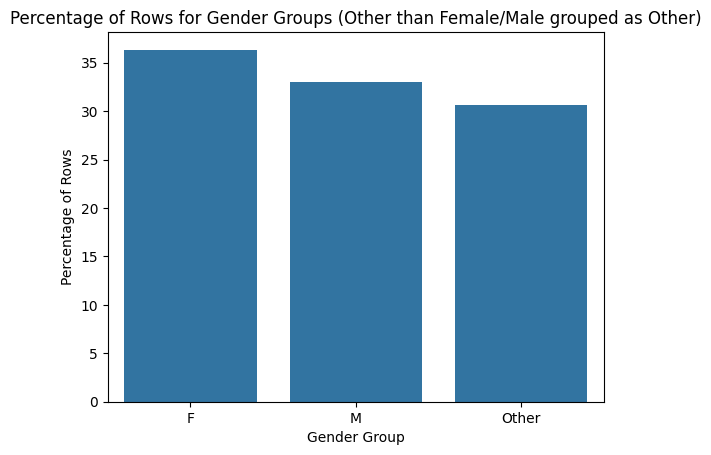

In [15]:

df['VIC_SEX_Group'] = df['VIC_SEX'].apply(lambda x: 'Other' if x not in ['F', 'M'] else x)

gender_counts = df['VIC_SEX_Group'].value_counts(normalize=True) * 100


sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender Group')
plt.ylabel('Percentage of Rows')
plt.title('Percentage of Rows for Gender Groups (Other than Female/Male grouped as Other)')
plt.show()


In [16]:

gender_table = pd.DataFrame({'Gender Group': gender_counts.index, 'Percentage of Rows': gender_counts.values})


print(gender_table)

  Gender Group  Percentage of Rows
0            F           36.342172
1            M           33.007527
2        Other           30.650302


**CLEAR GENDERS**

In [17]:
 df = df.query('VIC_SEX in ["F", "M"]')

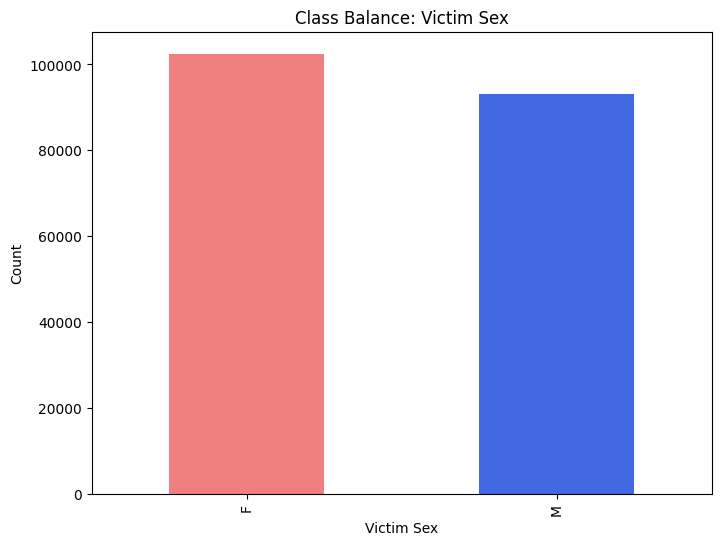

In [18]:


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['VIC_SEX'].value_counts().plot(kind='bar', color=['lightcoral', 'royalblue'])
plt.title('Class Balance: Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()


In [19]:

gender_counts = df['VIC_SEX'].value_counts()
total_count = gender_counts.sum()
frequency_table = pd.DataFrame({'Frequency': gender_counts,
                               'Percent of Total Count': (gender_counts / total_count) * 100})
frequency_table.loc['Total'] = frequency_table.sum()
print(frequency_table)

         Frequency  Percent of Total Count
VIC_SEX                                   
F         102510.0               52.404225
M          93104.0               47.595775
Total     195614.0              100.000000


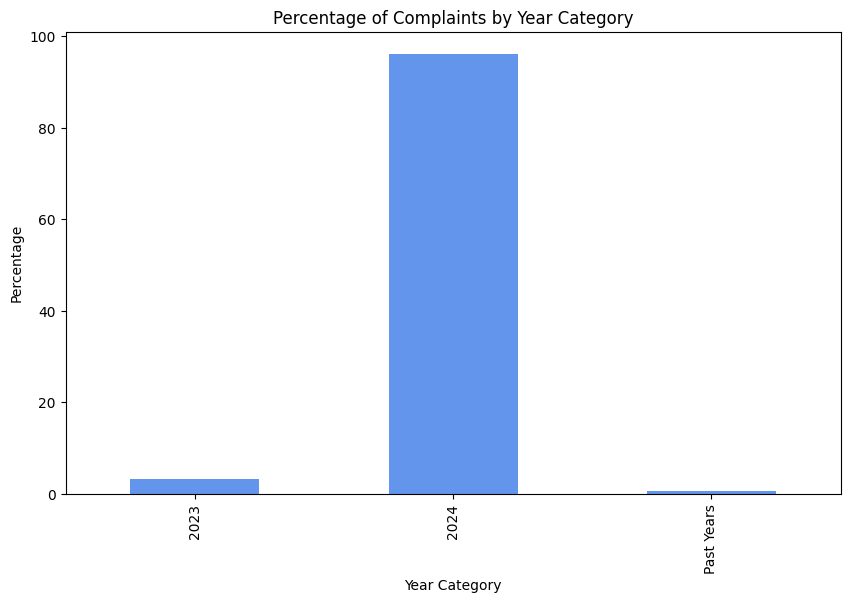

Year_Category
2023           3.196188
2024          96.091673
Past Years     0.712139
Name: CMPLNT_FR_DT, dtype: float64


In [20]:

import matplotlib.pyplot as plt
df_copy = df.copy()

df_copy['CMPLNT_FR_DT'] = pd.to_datetime(df_copy['CMPLNT_FR_DT'], errors='coerce')

df_copy['Year'] = df_copy['CMPLNT_FR_DT'].dt.year

year_counts = df_copy.groupby('Year')['CMPLNT_FR_DT'].count()
year_percentages = (year_counts / year_counts.sum()) * 100

df_copy['Year_Category'] = 'Past Years'
df_copy.loc[df_copy['Year'] == 2023, 'Year_Category'] = '2023'
df_copy.loc[df_copy['Year'] == 2024, 'Year_Category'] = '2024'


year_category_counts = df_copy.groupby('Year_Category')['CMPLNT_FR_DT'].count()
year_category_percentages = (year_category_counts / year_category_counts.sum()) * 100


plt.figure(figsize=(10, 6))
year_category_percentages.plot(kind='bar', color='cornflowerblue')
plt.title('Percentage of Complaints by Year Category')
plt.xlabel('Year Category')
plt.ylabel('Percentage')
plt.show()

print(year_category_percentages)

In [21]:
df.shape

(195614, 22)

**CLEAR DATES**

In [22]:
from tqdm import tqdm
dates = []

for dt in tqdm(df['CMPLNT_FR_DT'].values):
    try:
        dates.append(pd.to_datetime(dt, format='%m/%d/%Y'))
    except:
        dates.append(None)

100%|██████████| 195614/195614 [00:32<00:00, 6067.98it/s]


In [23]:
df.shape

(195614, 22)

In [24]:
df['date'] = dates

In [25]:
df = df.dropna()

In [26]:
df = df[df['date'] > '2024-01-01']

In [27]:
df['datetime'] = pd.to_datetime(df['CMPLNT_FR_DT'] + ' ' + df['CMPLNT_FR_TM'])

In [28]:
df.shape #after cleaning dates

(186524, 24)

**CLEAR AGES**

In [29]:

df['VIC_AGE_GROUP_Categorized'] = df['VIC_AGE_GROUP'].apply(
    lambda x: 'Other' if x not in ['18-24', '25-44', '45-64', '65+', '<18'] else x
)

age_group_counts = df['VIC_AGE_GROUP_Categorized'].value_counts(normalize=True) * 100

frequency_table = pd.DataFrame({'Frequency': df['VIC_AGE_GROUP_Categorized'].value_counts(),
                               'Percent of Total Count': age_group_counts})
frequency_table.loc['Total'] = frequency_table.sum()
print(frequency_table)


                           Frequency  Percent of Total Count
VIC_AGE_GROUP_Categorized                                   
25-44                        89785.0               48.135897
45-64                        46136.0               24.734619
18-24                        20947.0               11.230190
65+                          12674.0                6.794836
<18                          10992.0                5.893075
Other                         5990.0                3.211383
Total                       186524.0              100.000000


In [30]:
true_ages = ['18-24', '25-44', '45-64', '65+', '<18']
df = df[df['VIC_AGE_GROUP'].isin(true_ages)]

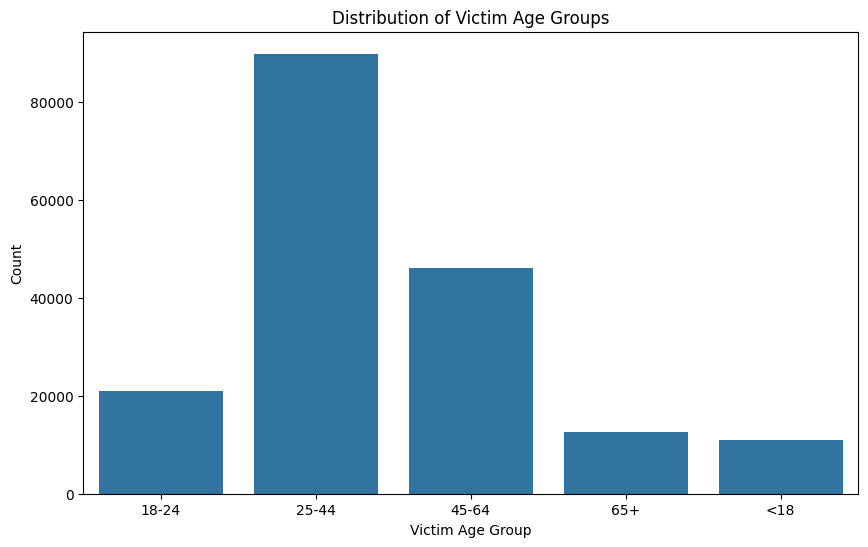

In [31]:

plt.figure(figsize=(10, 6))
sns.countplot(x='VIC_AGE_GROUP', data=df)
plt.title('Distribution of Victim Age Groups')
plt.xlabel('Victim Age Group')
plt.ylabel('Count')
plt.show()


In [33]:
df['hour']=df['datetime'].dt.dayofweek
df['dayofweek']=df['datetime'].dt.dayofweek
df['month']=df['datetime'].dt.month

In [34]:
import numpy as np
features = ['LAW_CAT_CD', 'PD_DESC', 'BORO_NM', 'PREM_TYP_DESC','LOC_OF_OCCUR_DESC', 'PARKS_NM', 'hour', 'dayofweek','month','VIC_RACE','VIC_AGE_GROUP']


In [35]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


**CATBOOST MODEL BUILDING**

In [36]:
from catboost import CatBoostClassifier

In [38]:


xdf = df[features]
y = df['VIC_SEX']


In [39]:
model = CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=12)
model.fit(xdf, y, cat_features=features, verbose=True, plot=False)

0:	learn: 0.6808316	total: 1.6s	remaining: 7m 58s
1:	learn: 0.6706653	total: 2.97s	remaining: 7m 22s
2:	learn: 0.6626283	total: 4.52s	remaining: 7m 27s
3:	learn: 0.6560533	total: 5.21s	remaining: 6m 25s
4:	learn: 0.6509962	total: 6.46s	remaining: 6m 21s
5:	learn: 0.6464829	total: 7.31s	remaining: 5m 58s
6:	learn: 0.6427779	total: 8.07s	remaining: 5m 37s
7:	learn: 0.6398019	total: 8.71s	remaining: 5m 17s
8:	learn: 0.6373152	total: 9.29s	remaining: 5m
9:	learn: 0.6348010	total: 9.99s	remaining: 4m 49s
10:	learn: 0.6328709	total: 10.8s	remaining: 4m 43s
11:	learn: 0.6310158	total: 11.6s	remaining: 4m 39s
12:	learn: 0.6295495	total: 12.3s	remaining: 4m 32s
13:	learn: 0.6282623	total: 13.1s	remaining: 4m 27s
14:	learn: 0.6272404	total: 13.9s	remaining: 4m 24s
15:	learn: 0.6262067	total: 15.1s	remaining: 4m 28s
16:	learn: 0.6253779	total: 16.4s	remaining: 4m 33s
17:	learn: 0.6246260	total: 16.8s	remaining: 4m 23s
18:	learn: 0.6238490	total: 17.4s	remaining: 4m 17s
19:	learn: 0.6231768	total:

In [40]:


print(model.get_best_score())

{'learn': {'Logloss': 0.6077013181205974}}


              Feature  Importance
1             PD_DESC   44.543799
3       PREM_TYP_DESC   20.532879
9            VIC_RACE   11.362533
10      VIC_AGE_GROUP    7.897098
4   LOC_OF_OCCUR_DESC    5.128010
2             BORO_NM    3.747269
0          LAW_CAT_CD    2.649261
8               month    1.677733
5            PARKS_NM    0.879240
6                hour    0.827314
7           dayofweek    0.754864


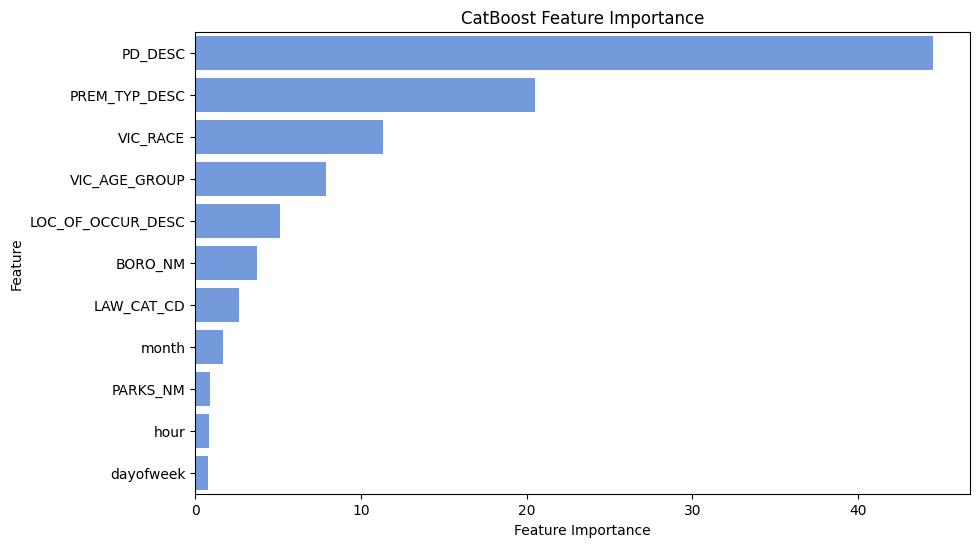

In [41]:

feature_importance = model.get_feature_importance()

feature_importance_df = pd.DataFrame({'Feature': xdf.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='cornflowerblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance')
plt.show()


**RANDOM FOREST MODEL BUILDING**

In [57]:
xdf = df[features + ['VIC_SEX']]
xdf = pd.get_dummies(data=xdf, columns=features)
X = xdf.iloc[:, 1:].values.astype(float)
le = LabelEncoder()
sex = le.fit_transform(xdf['VIC_SEX'].values)
y = sex


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy_score(y_test, pred)

0.6263605395075748

In [59]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=xdf.columns[:-1])

In [60]:
orig_importances = []
for feature in features:
    imp = forest_importances[forest_importances.reset_index()['index'].apply(lambda x: x.startswith(feature)).values].sum()
    orig_importances.append(imp)

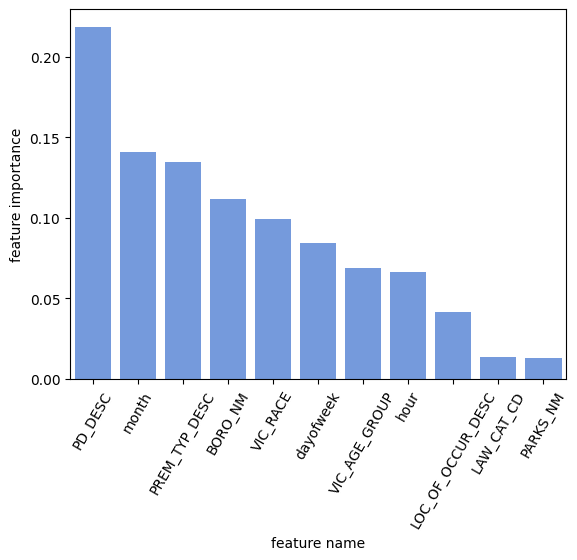

In [61]:
x = [x for _, x in sorted(zip(orig_importances, features), key=lambda pair: pair[0])]
y = sorted(orig_importances)
sns.barplot(x=x[::-1], y=y[::-1], color='cornflowerblue')
plt.xticks(rotation=60)
plt.ylabel('feature importance')
plt.xlabel('feature name');

SHAP FOR CATBOOST


**SHAP EXLANATION FOR CATBOOST MODEL PREDICTION**

In [42]:
!pip install shap

In [43]:
import shap

In [48]:
shap.initjs()

In [45]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(xdf[:1000],y)


In [46]:
shap_values.shape

(1000, 11)

Shap explanation of first item of predicted values  - PD_DESC: RAPE (type of crime) and PREM_TYPE_DESC (location) are the most important features and associated with female victim

In [50]:
shap.initjs()
shap.plots.force(shap_values[0, ...])

Shap explanation of first item of predicted values  - PD_DESC: LEAVING_SCENE_ACCIDENT (type of crime) and PREM_TYPE_DESC:STREET (location) are the most important features associated with male victim

In [53]:
shap.initjs()
shap.plots.force(shap_values[7, ...])

In [54]:
y[:10]

,VIC_SEX
0,F
2,F
3,F
6,F
7,M
8,M
9,M
10,F
18,M
21,F
